In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
df = pd.read_excel(r"./Data/Data.xlsx")
print(df.shape)
df.head()

(10683, 11)


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,Null,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,Null,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,Null,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,Null,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,Null,13302


In [3]:
df.dropna(inplace=True)

In [5]:
print(df.duplicated().sum())

220


In [6]:
df.drop_duplicates(inplace=True)

In [7]:
print(df.duplicated().sum())

0


In [8]:
df['Journey_day'] = pd.to_datetime(df['Date_of_Journey'], format="%d/%m/%Y").dt.day

In [9]:
df['Journey_month'] = pd.to_datetime(df['Date_of_Journey'], format="%d/%m/%Y").dt.month

In [10]:
df.drop(['Date_of_Journey'],axis=1, inplace=True)

In [11]:
df['Dep_hour'] = pd.to_datetime(df['Dep_Time']).dt.hour
df['Dep_min'] = pd.to_datetime(df['Dep_Time']).dt.minute

df.drop(['Dep_Time'],axis=1, inplace=True)

In [12]:
df['Arrival_hour'] = pd.to_datetime(df['Arrival_Time']).dt.hour
df['Arrival_min'] = pd.to_datetime(df['Arrival_Time']).dt.minute

df.drop(['Arrival_Time'],axis=1, inplace=True)

In [13]:
import re

# Function to extract hours and minutes
def extract_time(time_str):
    hours = re.search(r'(\d+)h', time_str)
    minutes = re.search(r'(\d+)m', time_str)
    
    hours = int(hours.group(1)) if hours else 0
    minutes = int(minutes.group(1)) if minutes else 0
    
    return {'hours': hours, 'minutes': minutes}

# Apply function to the DataFrame
df[["Duration_hours", "Duration_mins"]] = df['Duration'].apply(lambda x: pd.Series(extract_time(x)))

In [14]:
df.drop(['Duration'],axis=1, inplace=True)

In [15]:
df['Airline'].value_counts()

Airline
Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

In [16]:
df.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [20]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,4,45


In [21]:
df.shape

(10462, 13)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10462 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Airline         10462 non-null  object
 1   Source          10462 non-null  object
 2   Destination     10462 non-null  object
 3   Total_Stops     10462 non-null  object
 4   Price           10462 non-null  int64 
 5   Journey_day     10462 non-null  int32 
 6   Journey_month   10462 non-null  int32 
 7   Dep_hour        10462 non-null  int32 
 8   Dep_min         10462 non-null  int32 
 9   Arrival_hour    10462 non-null  int32 
 10  Arrival_min     10462 non-null  int32 
 11  Duration_hours  10462 non-null  int64 
 12  Duration_mins   10462 non-null  int64 
dtypes: int32(6), int64(3), object(4)
memory usage: 899.1+ KB


In [17]:
df.describe()

,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
count,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000
mean,9026.790289,13.463200,4.701491,12.478494,24.404989,13.387689,24.719939,10.026190,28.210189
std,4624.849541,8.467493,1.163802,5.727227,18.815719,6.855547,16.570450,8.378023,16.879185
min,1759.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5224.000000,6.000000,3.000000,8.000000,5.000000,8.000000,10.000000,2.000000,15.000000
50%,8266.000000,12.000000,5.000000,11.000000,25.000000,14.000000,25.000000,8.000000,30.000000
75%,12344.750000,21.000000,6.000000,18.000000,40.000000,19.000000,35.000000,15.000000,45.000000
max,79512.000000,27.000000,6.000000,23.000000,55.000000,23.000000,55.000000,47.000000,55.000000


In [22]:
num_cols = [cols for cols in df.columns if df[cols].dtype != 'O']
cat_cols = [cols for cols in df.columns if df[cols].dtype == 'O']

print(f"We have {len(num_cols)} numeric features which are : {num_cols}\n" )
print(f"We have {len(cat_cols)} categorical features which are : {cat_cols} " )

We have 9 numeric features which are : ['Price', 'Journey_day', 'Journey_month', 'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours', 'Duration_mins']

We have 4 categorical features which are : ['Airline', 'Source', 'Destination', 'Total_Stops'] 


In [23]:
for col in cat_cols:
    print(df[col].value_counts(normalize=True) * 100)
    print('\n**************************')

Airline
Jet Airways                          35.366087
IndiGo                               19.527815
Air India                            16.191933
Multiple carriers                    11.431849
SpiceJet                              7.790097
Vistara                               4.568916
Air Asia                              3.049130
GoAir                                 1.854330
Multiple carriers Premium economy     0.124259
Jet Airways Business                  0.057350
Vistara Premium economy               0.028675
Trujet                                0.009558
Name: proportion, dtype: float64

**************************
Source
Delhi       41.531256
Kolkata     27.337029
Banglore    20.827758
Mumbai       6.662206
Chennai      3.641751
Name: proportion, dtype: float64

**************************
Destination
Cochin       41.531256
Banglore     27.337029
Delhi        12.091378
New Delhi     8.736379
Hyderabad     6.662206
Kolkata       3.641751
Name: proportion, dtype: float64

*****

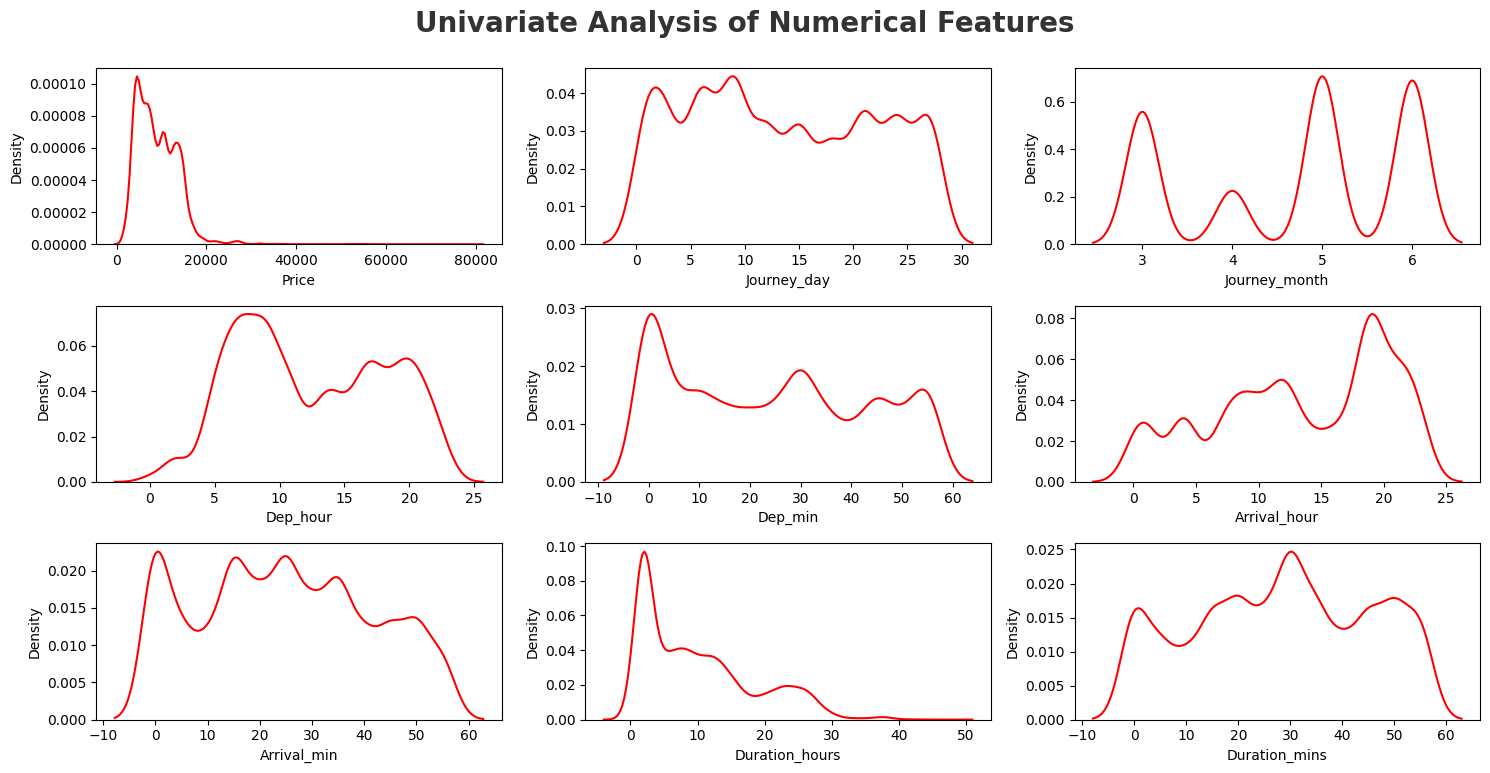

In [24]:
plt.figure(figsize=(15, 12))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(num_cols)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[num_cols[i]], color='r')
    plt.xlabel(num_cols[i])
    plt.tight_layout()

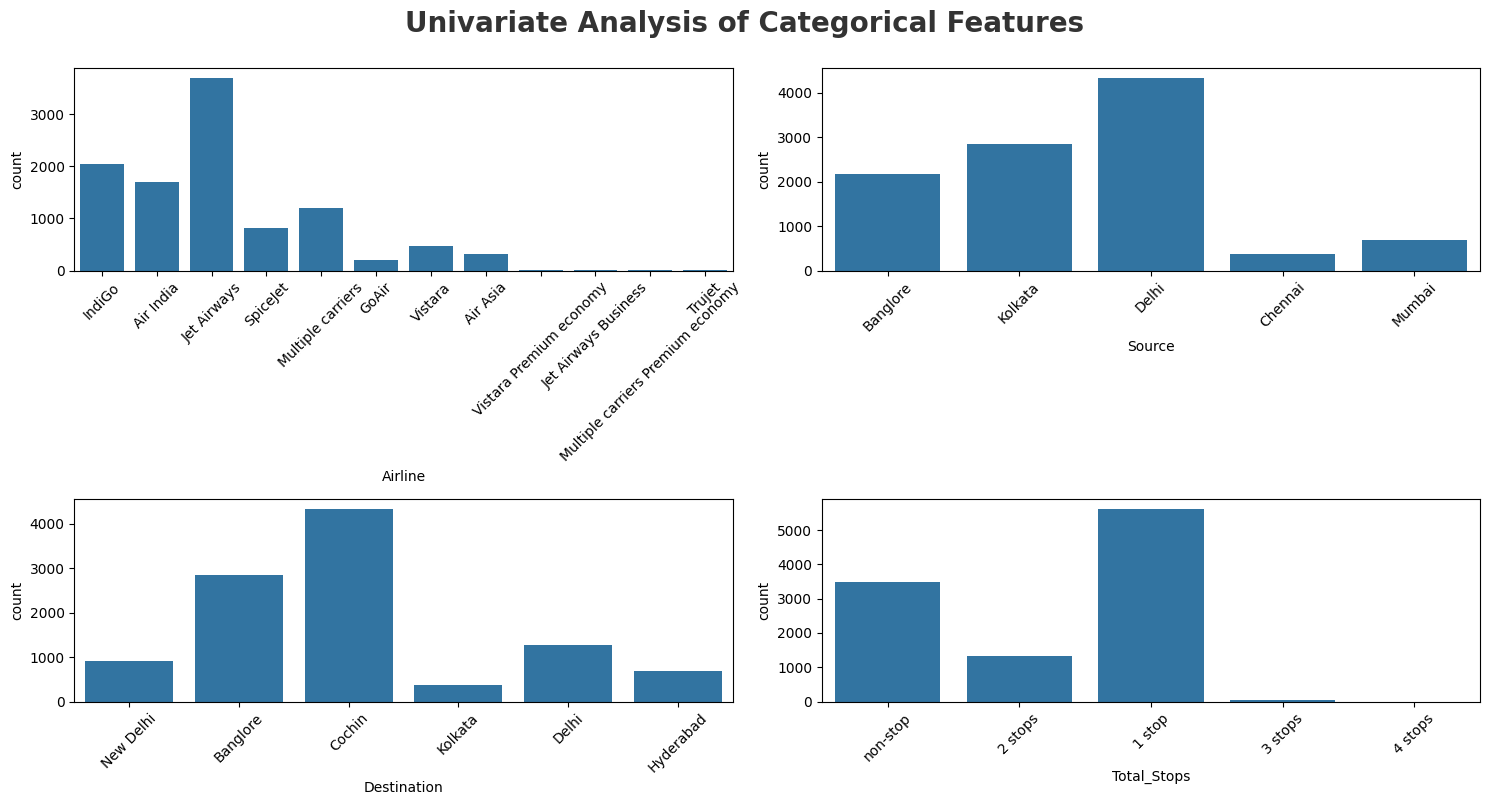

In [27]:
plt.figure(figsize=(15, 8))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(cat_cols)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=df[cat_cols[i]])
    plt.xticks(rotation=45)
    plt.xlabel(cat_cols[i])
    plt.tight_layout()

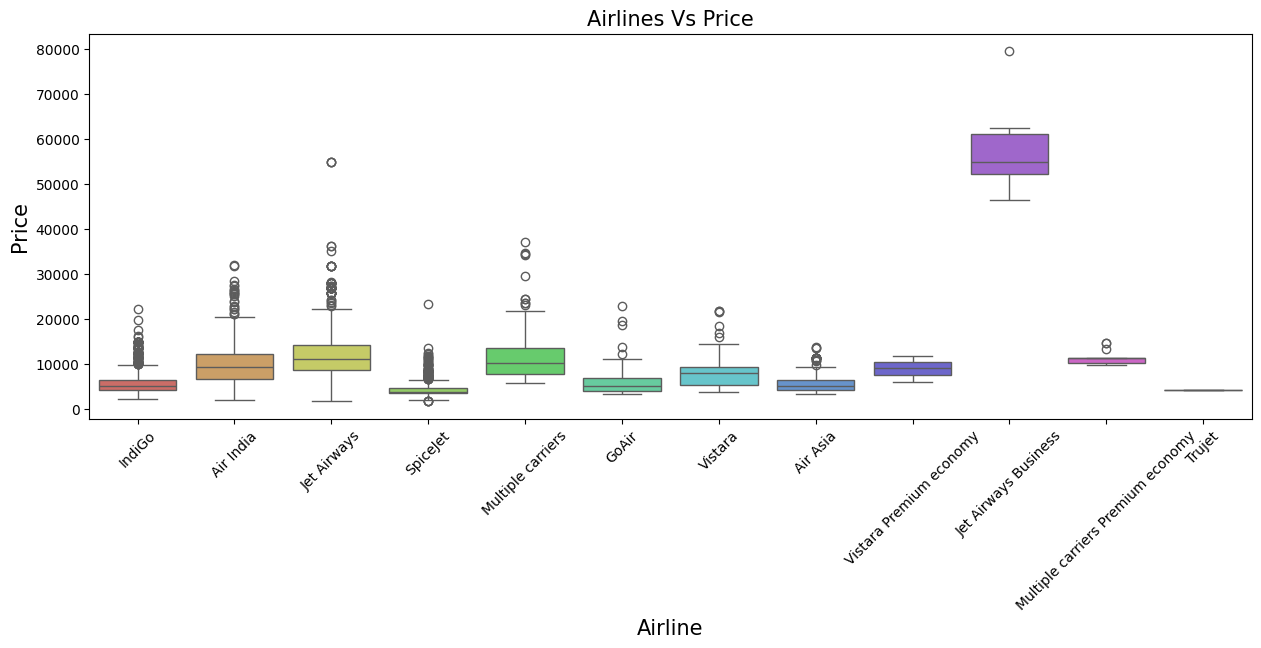

In [29]:
plt.figure(figsize=(15,5))
sns.boxplot(x=df['Airline'],y=df['Price'],palette='hls')
plt.title('Airlines Vs Price',fontsize=15)
plt.xticks(rotation=45)
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

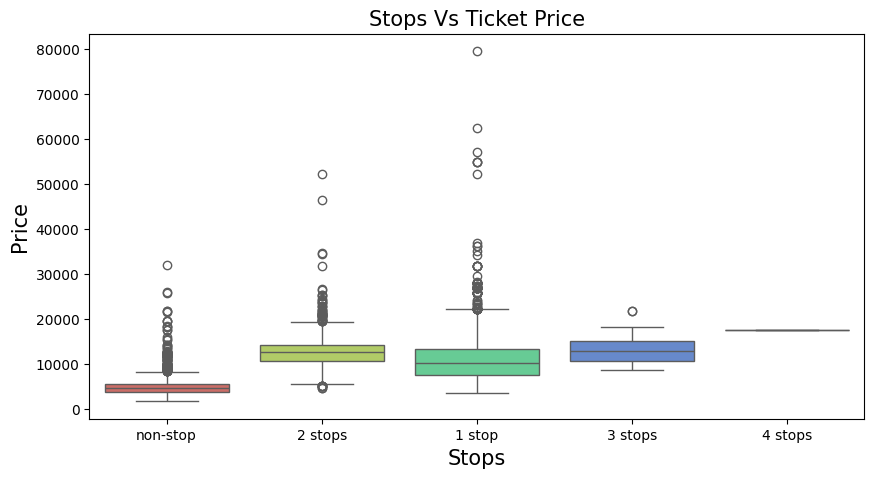

In [30]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Total_Stops',y='Price',data=df,palette='hls')
plt.title('Stops Vs Ticket Price',fontsize=15)
plt.xlabel('Stops',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

In [32]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,4,45


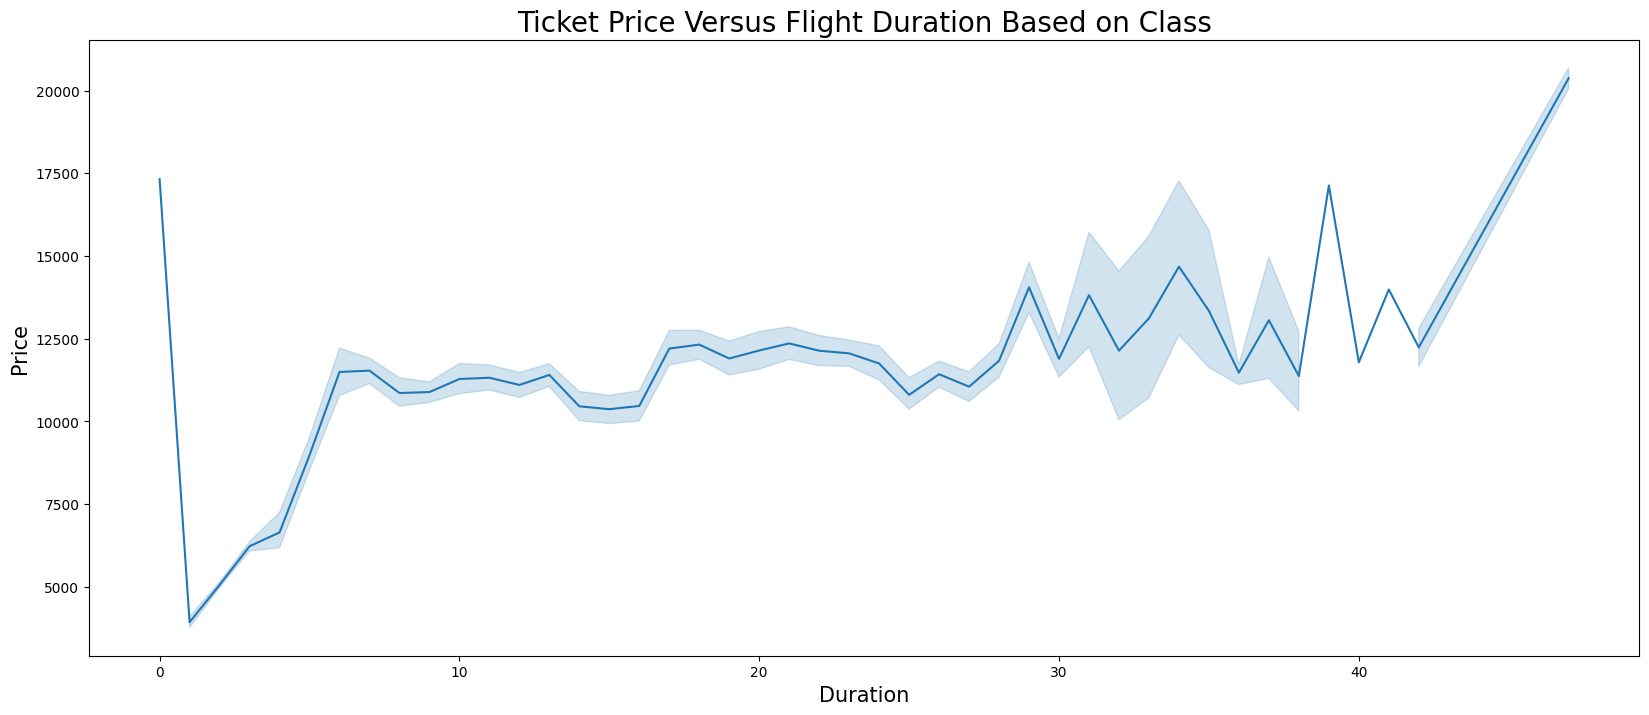

In [39]:
plt.figure(figsize=(20,8))
sns.lineplot(data=df,x='Duration_hours',y='Price',palette='hls')
plt.title('Ticket Price Versus Flight Duration Based on Class',fontsize=20)
plt.xlabel('Duration',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

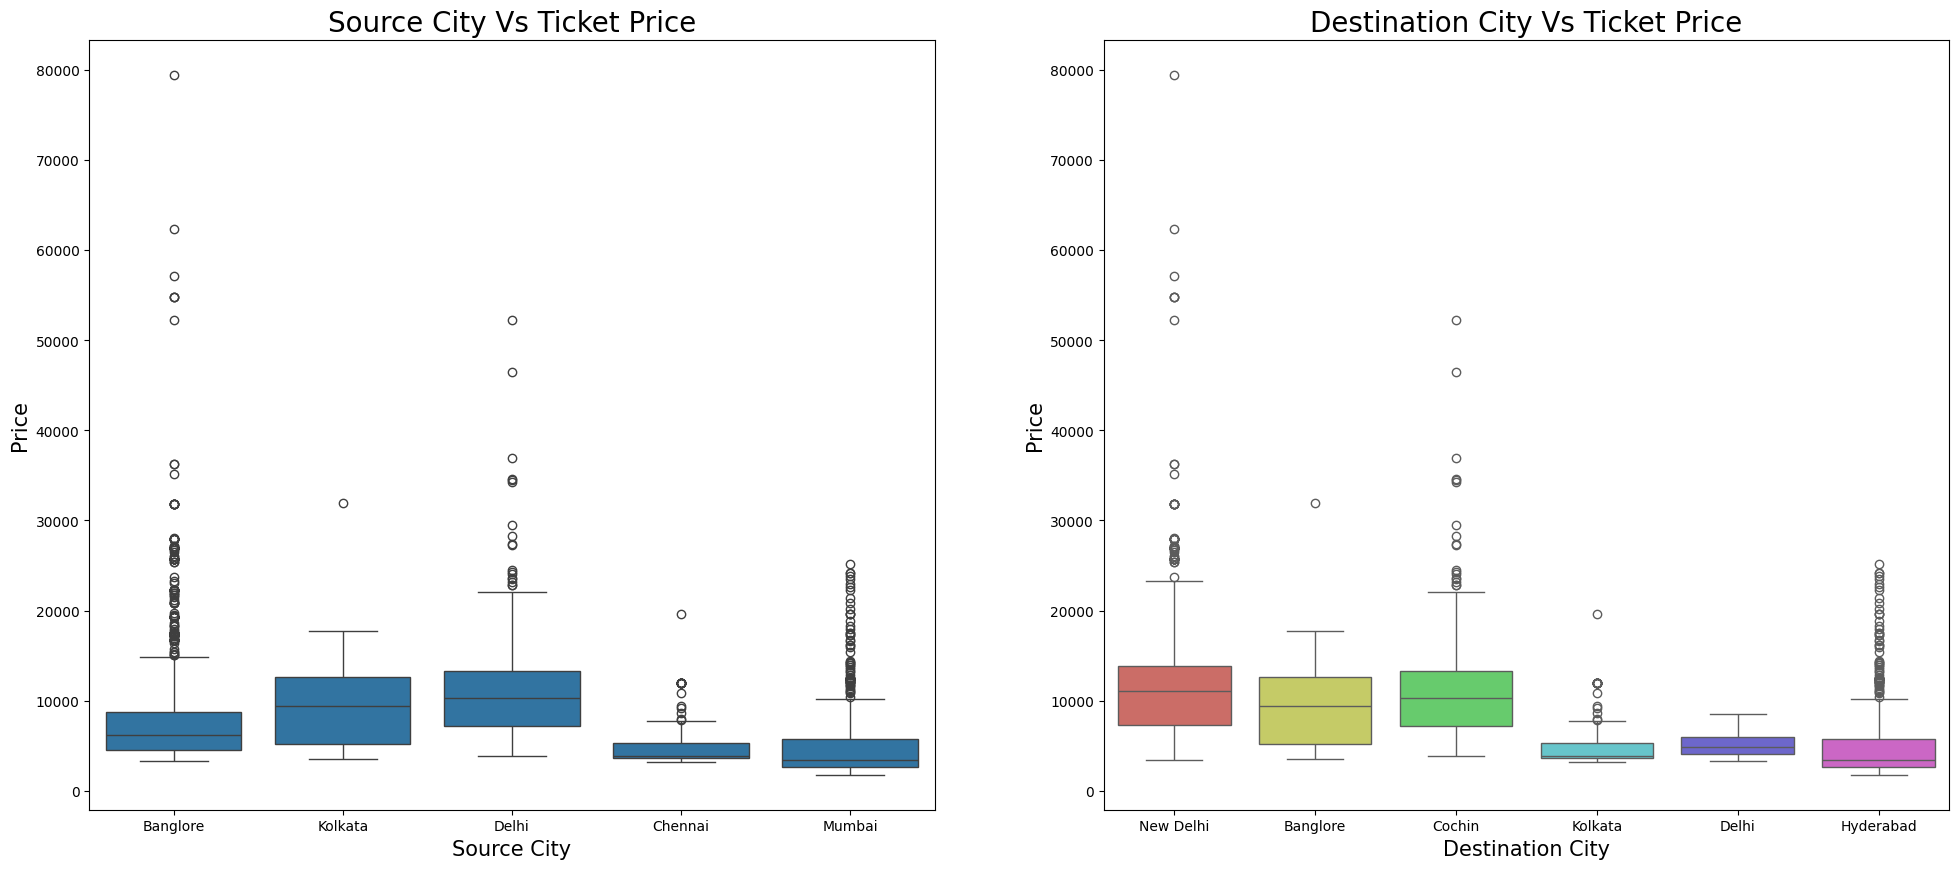

In [35]:
plt.figure(figsize=(24,10))
plt.subplot(1,2,1)
sns.boxplot(x='Source',y='Price',data=df)
plt.title('Source City Vs Ticket Price',fontsize=20)
plt.xlabel('Source City',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(x='Destination',y='Price',data=df,palette='hls')
plt.title('Destination City Vs Ticket Price',fontsize=20)
plt.xlabel('Destination City',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

In [36]:
df.groupby(['Airline','Source','Destination'],as_index=False)['Price'].mean().head(10)

,Airline,Source,Destination,Price
0,Air Asia,Banglore,Delhi,4265.577465
1,Air Asia,Banglore,New Delhi,5791.944444
2,Air Asia,Delhi,Cochin,7804.175000
3,Air Asia,Kolkata,Banglore,5012.320000
4,Air India,Banglore,Delhi,6045.166667
5,Air India,Banglore,New Delhi,11024.679426
6,Air India,Chennai,Kolkata,5895.640000
7,Air India,Delhi,Cochin,9960.348506
8,Air India,Kolkata,Banglore,10296.273453
9,Air India,Mumbai,Hyderabad,6260.051471
